In [44]:
# Download Weblink: https://www.kaggle.com/saurabh00007/diabetescsv?select=diabetes.csv

import pandas as pd
df = pd.read_csv('diabetes.csv') # reading the data
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [45]:
df.describe() # Stats of each feature / column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
# Observation:
        # "Count" values of each feature is same , which is 768,
        # So there are no Null values in any feature
# lets check
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

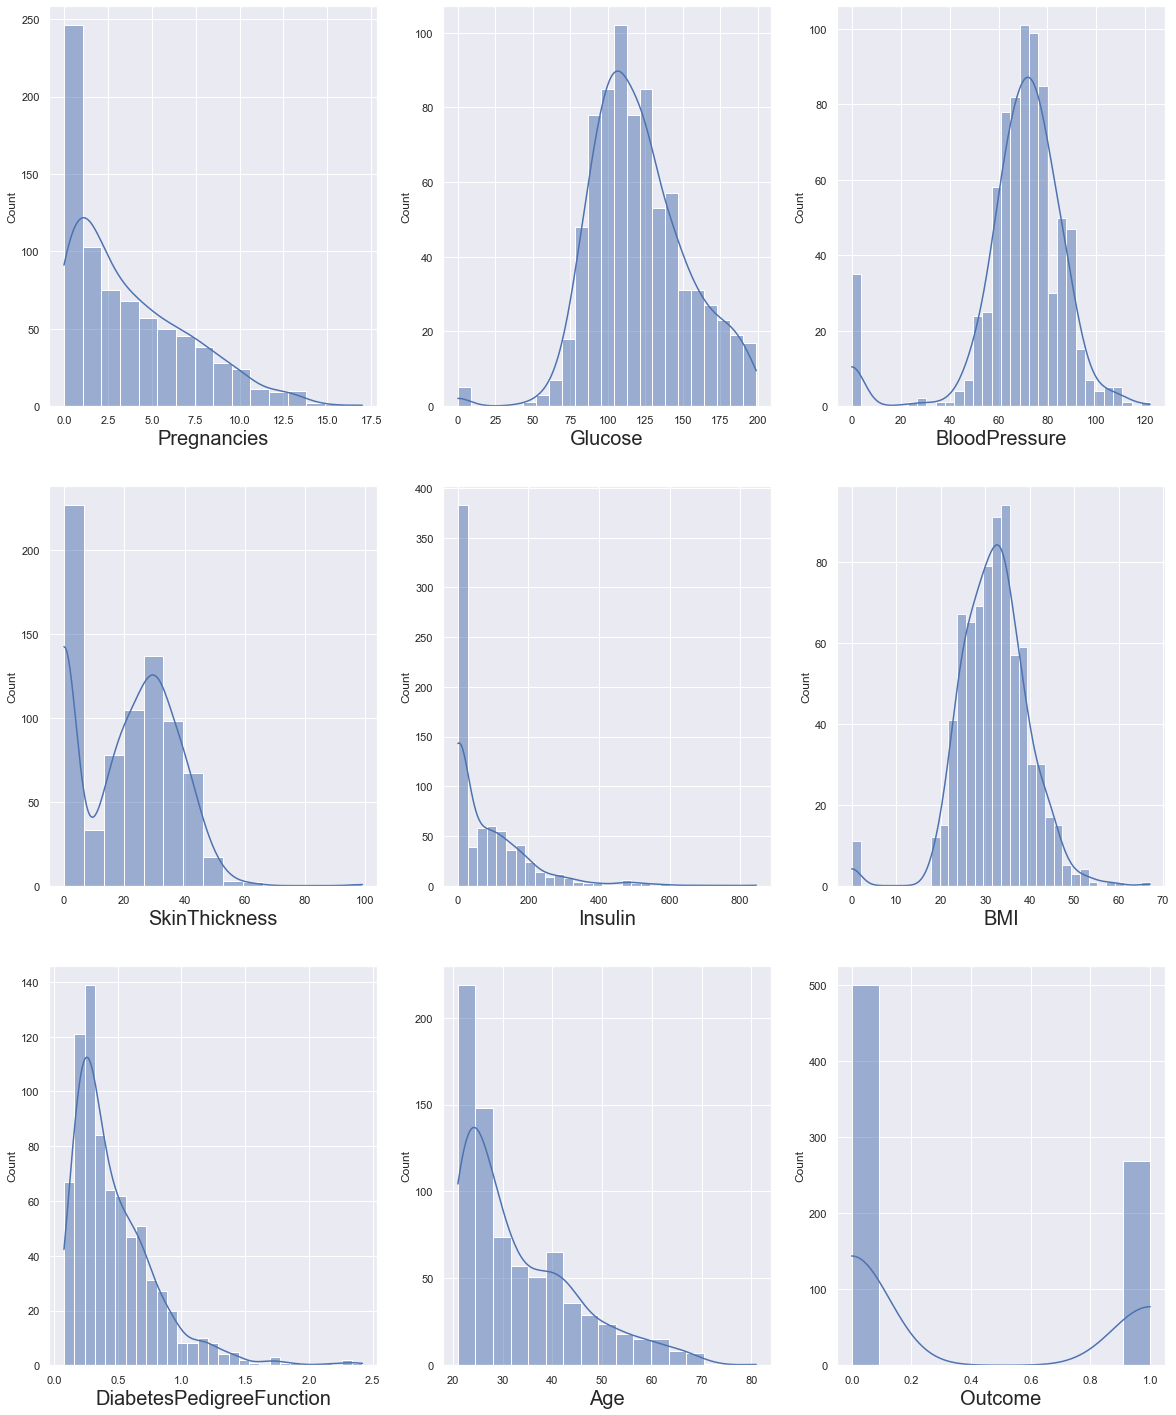

In [47]:
# Visualizing the distribution of data for each feature
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in df:
    if plotnumber <= 9: # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(df[column],kde=True) # plotting COMBINED graph
        plt.xlabel(column,fontsize=20) # labeling X-scale
        # plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [48]:
# Observation:
    # Normalized: Glucose, BloodPressure, BMI
    # SKewed: Pregnancies , Insulin, DiabetesPedigreeFunction, Age
    # Not Normalized: SkinThickness, Outcome

In [49]:
# replacing ZERO values with MEAN of the columns
df['Pregnancies'] = df['Pregnancies'].replace(0,df['Pregnancies'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean()) 
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean()) 
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['Outcome'] = df['Outcome'].replace(0,df['Outcome'].mean()) 

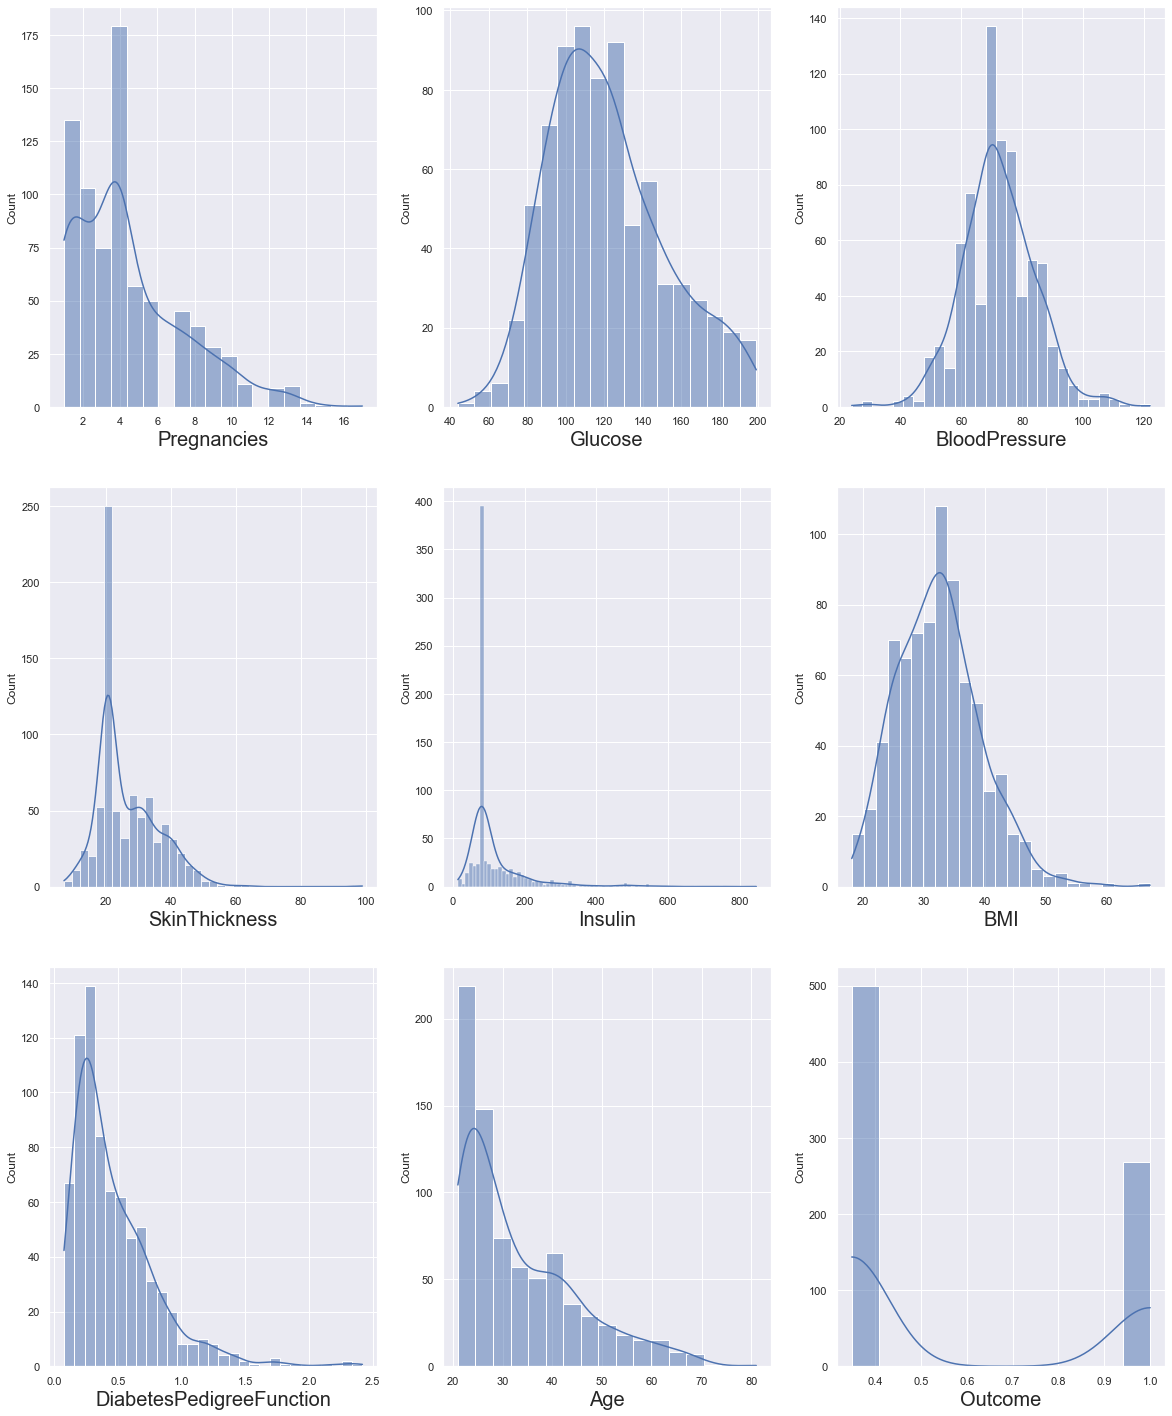

In [50]:
# After REPLACEMENT,
        # Visualizing the distribution of data for each feature
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in df:
    if plotnumber <= 9: # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(df[column],kde=True) # plotting COMBINED graph
        plt.xlabel(column,fontsize=20) # labeling X-scale
        # plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [51]:
# Observation:
    # Pregnancies: moved from skewed (before replcement) to normalized (after replacement)
    # Glucose
    # BloodPressure
    # SkinThickness
    # Insulin
    # BMI
    # DiabetesPedigreeFunction
    # Age
    # Outcome

<AxesSubplot:>

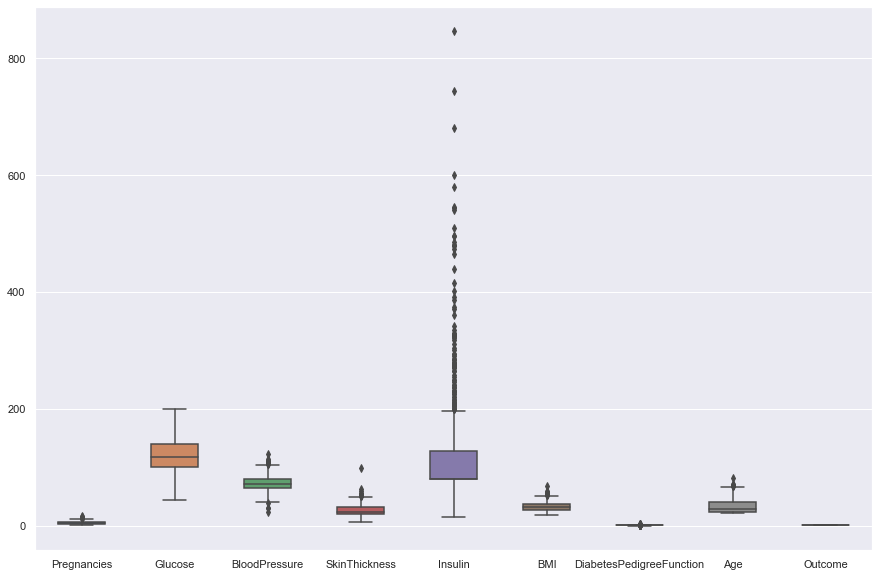

In [52]:
# finding Outliers
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width=0.5,ax=ax, 
            #filtersize=30
           )

In [53]:
# Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome

In [54]:
# to remove the Outliers
    # drop certain percentage of top data from each feature
    
q = df['Pregnancies'].quantile(0.98) #removing top 2% data from 'Pregnancies' feature / column
data_cleaned = df[df['Pregnancies']<q]

q = df['BMI'].quantile(0.99) #removing top 1% data from 'BMI' feature / column
data_cleaned = df[df['BMI']<q]

q = df['SkinThickness'].quantile(0.99) #removing top 1% data from 'SkinThickness' feature / column
data_cleaned = df[df['SkinThickness']<q]

q = df['Insulin'].quantile(0.95) #removing top 5% data from 'Insulin' feature / column
data_cleaned = df[df['Insulin']<q]

q = df['DiabetesPedigreeFunction'].quantile(0.98) #removing top 1% data from 'DiabetesPedigreeFunction' feature / column
data_cleaned = df[df['DiabetesPedigreeFunction']<q]

q = df['Age'].quantile(0.98) #removing top 1% data from 'Age' feature / column
data_cleaned = df[df['Age']<q]


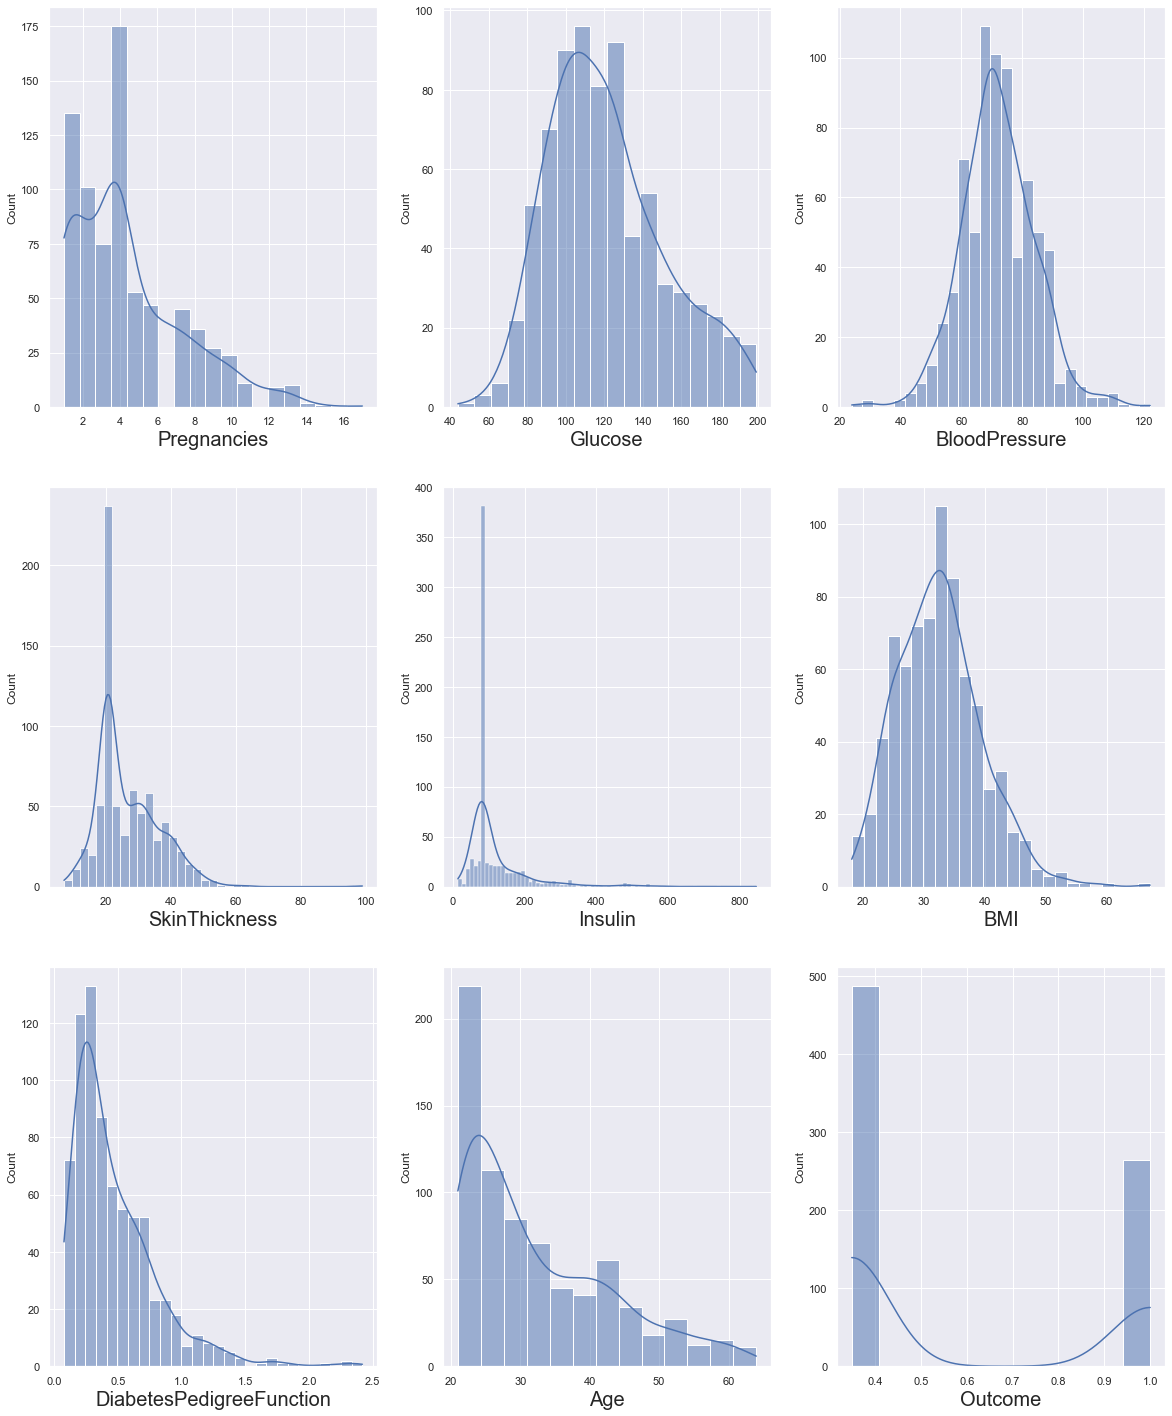

In [55]:
# # Visualizing the distribution of data for each feature

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in data_cleaned: # "df" is replaced with "data_cleaned"
    if plotnumber <= 9: # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(data_cleaned[column],kde=True) # plotting COMBINED graph
        plt.xlabel(column,fontsize=20) # labeling X-scale
        # plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [56]:
# observation:
        # most of the datasets / graphs are normalized

In [57]:
# defining dependent (y) and In-dependent (Xi) variables
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

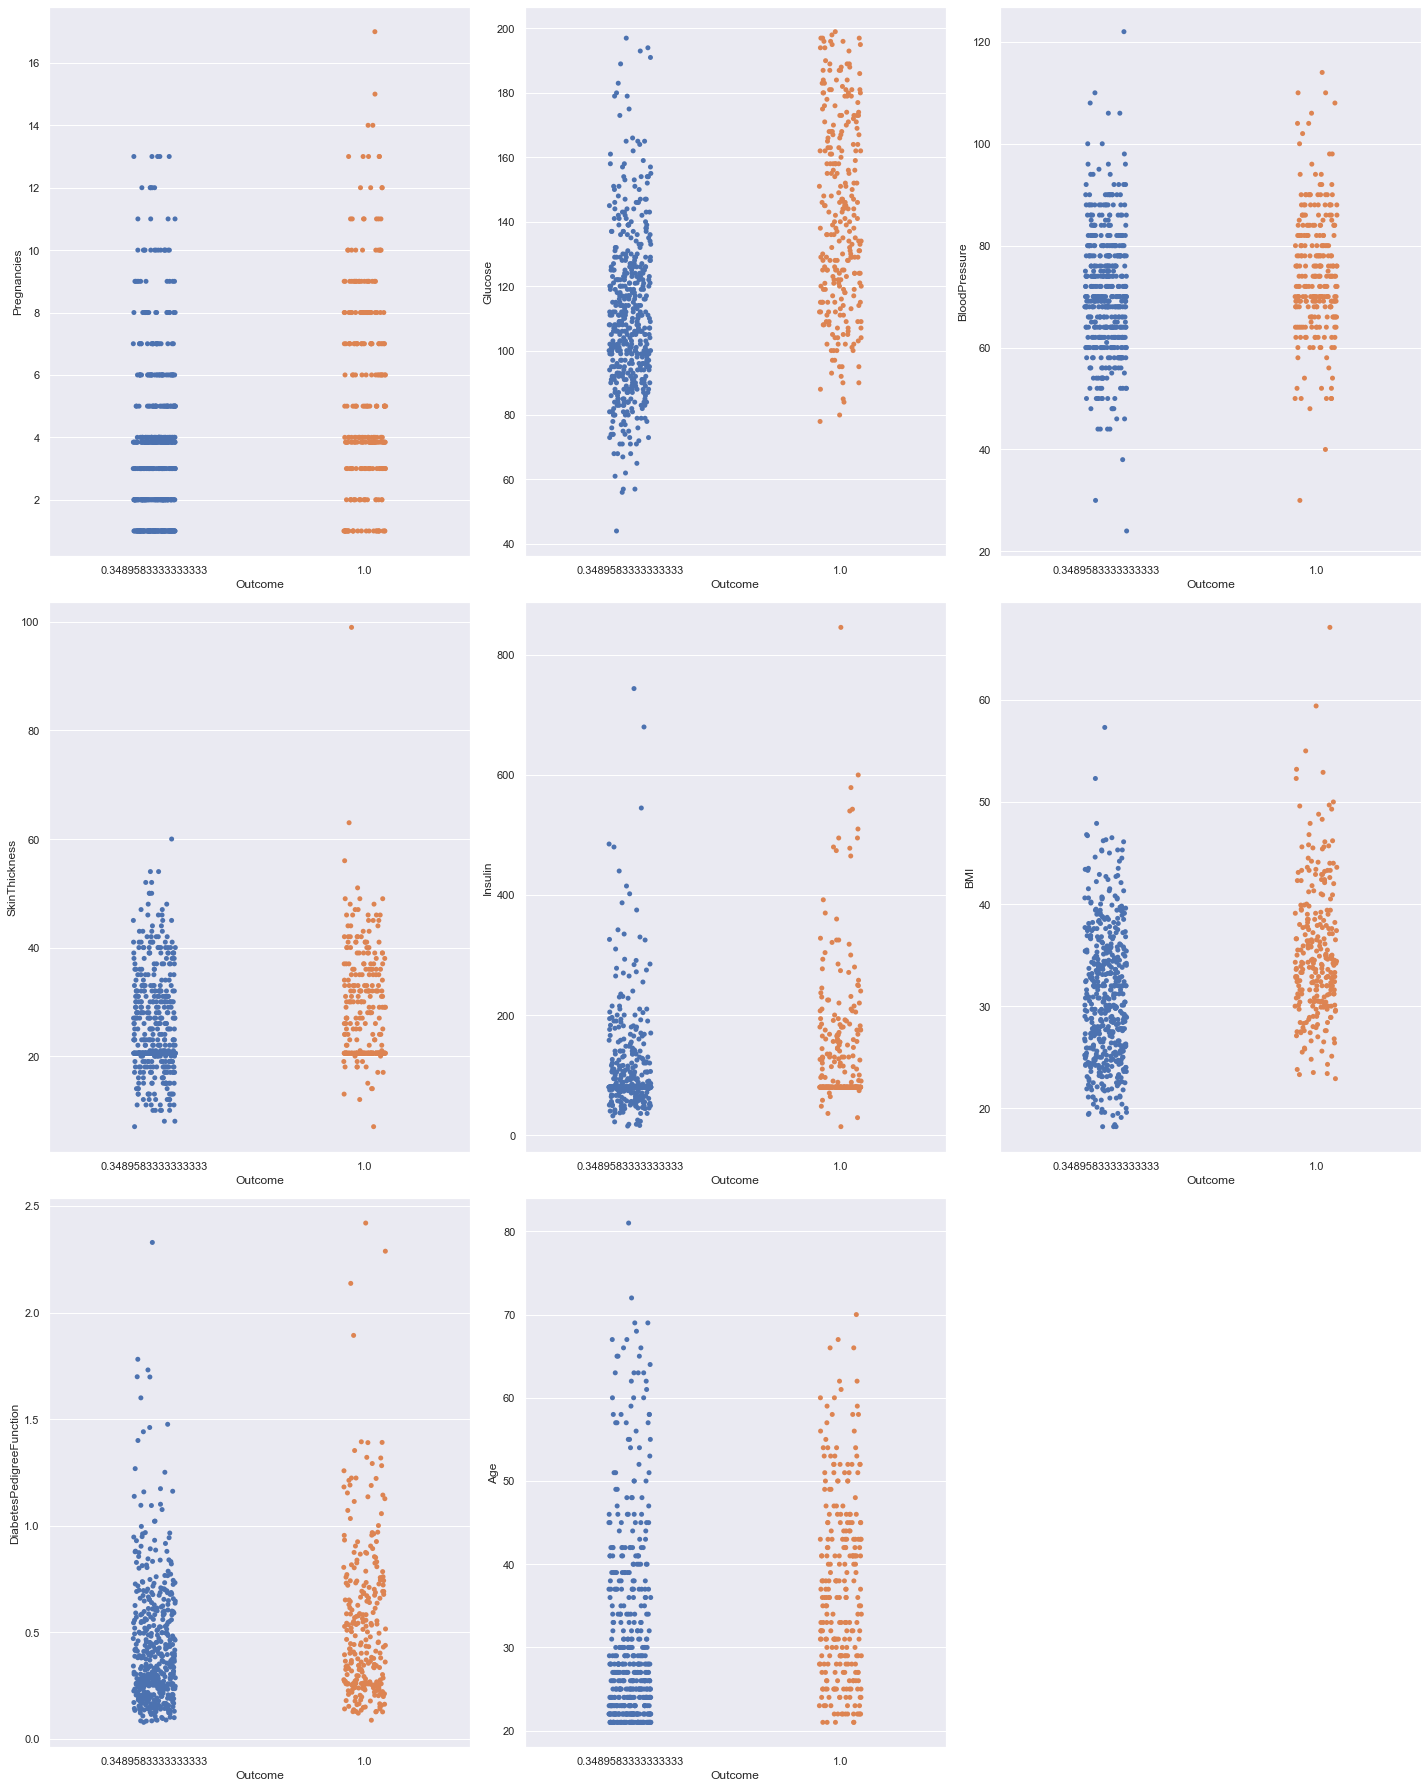

In [58]:
# Visualizing the relationship beween dependent (y) and In-dependent (Xi) variables

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column]) # "hist-plot" is replaced with "strip-plot"
        # "data_cleaned[column]" is replaced with "y"
    plotnumber+=1
plt.tight_layout()

In [59]:
# observation: Equal amount of dataset for each outcome [0 & 1]

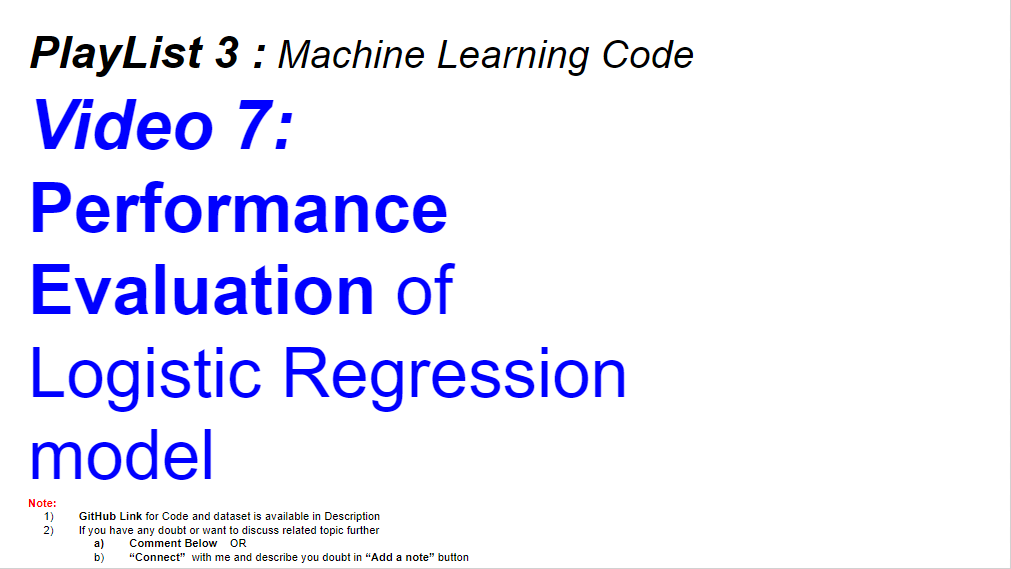

In [60]:
# but the datasets have various ranges
# e.g - "Pregnancies" varies from 0 to 16
       # "Glucose" varies from 0 to 200
    
# Hence, lets scale the data
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
#y = scalar.fit_transform(y)

In [61]:
X_scaled

array([[ 0.5362511 ,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-1.1403533 , -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.20689286,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.20093022, -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-1.1403533 ,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-1.1403533 , -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

# Multi-Collinearity

In [62]:
# to identify the degree of multicollinearity.
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

# lets check the values
vif

,vif,Features
0,1.410013,Pregnancies
1,1.347415,Glucose
2,1.252549,BloodPressure
3,1.450493,SkinThickness
4,1.264171,Insulin
5,1.559203,BMI
6,1.056273,DiabetesPedigreeFunction
7,1.546208,Age


In [63]:
# Observation: All the VIF values are less than 5 and are very low. 
    # That means NO multicollinearity. 

In [64]:
# Now, we can go ahead with fitting our data to the model.
     #Before that, let's split our data in test and training set.
from sklearn.model_selection import train_test_split
    
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)
# "test_size=0.25" ~ 75% of the data for training purpose

In [65]:
x_train

array([[-0.46971154, -1.37037543,  0.80485303, ...,  0.25458032,
         2.4768709 , -0.53102292],
       [-1.1403533 , -0.4826904 , -1.83801875, ..., -0.60411411,
        -0.87848095, -0.36084741],
       [ 1.87753462,  0.01046794, -0.35140338, ..., -0.18204397,
        -0.64593181,  0.66020563],
       ...,
       [-1.1403533 ,  0.56938074, -2.16837773, ..., -0.54589754,
         0.55003518, -0.95646168],
       [ 0.5362511 ,  0.83239852,  0.63967354, ..., -0.4294644 ,
        -0.88754131,  1.4259954 ],
       [-1.1403533 ,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215]])

In [66]:
x_train = x_train.astype(int) # converting float arrays into INT array, 
                                #As LOG regression needs class, which is generally INTeger
x_train

array([[ 0, -1,  0, ...,  0,  2,  0],
       [-1,  0, -1, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       ...,
       [-1,  0, -2, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  1],
       [-1,  0, -1, ...,  0,  0,  1]])

In [67]:
 # converting float arrays into INT array, 
y_train = y_train.astype(int)
x_test = x_test.astype(int)
y_test = y_test.astype(int)

In [68]:
# Now, we can go ahead with fitting our data to the model.
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [69]:
# to save the Fitted model

import pickle
# to write different files to file
with open( 'modelForPrediction.sav','wb') as f:
    pickle.dump(log_reg,f)

with open( 'standardScalar.sav','wb') as f:
    pickle.dump(scalar,f)

In [70]:
# to call the model on PREDICTion dataset
y_pred = log_reg.predict(x_test)

In [72]:
# to measure the perfomance metrics of the model

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
print ("accuracy_score  =  ",accuracy * 100, " %")

accuracy_score  =   76.04166666666666  %


In [73]:
# to measure the perfomance metrics of the model

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,y_pred)
print('\n' ,conf_mat , ' = confusion_matrix')


 [[115  10]
 [ 36  31]]  = confusion_matrix


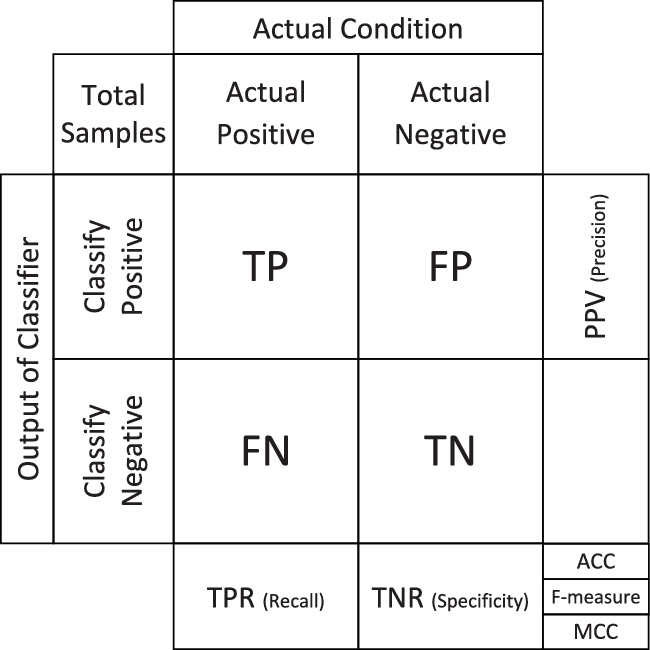

In [74]:
TP = conf_mat[0][0] # true_positive 
FP = conf_mat[0][1] # false_positive 
FN = conf_mat[1][0]  # false_negative 
TN = conf_mat[1][1]  # true_negative 

In [75]:
# Accuracy
Accuracy = (TP + TN) / (TP + TN + FP + FN) * 100
print ("Accuracy" , Accuracy, " %")

Accuracy 76.04166666666666  %


In [76]:
# Precison
Precison = (TP) / (TP + FP) * 100
print ("Precison" , Precison, " %")

Precison 92.0  %


In [77]:
# Recall
Recall = (TP) / (TP + FN) * 100
print ("Recall" , Recall, " %")

Recall 76.15894039735099  %


In [78]:
# F1 Score
F1_Score = 2 * (Recall*Precison) / (Recall+Precison)
print ("F1_Score" , F1_Score, " %")

F1_Score 83.33333333333333  %


In [79]:
# Area under Curve (AUC)

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred) * 100
print('roc_auc_score  = ', auc , "%")

roc_auc_score  =  69.13432835820895 %


In [80]:
# ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

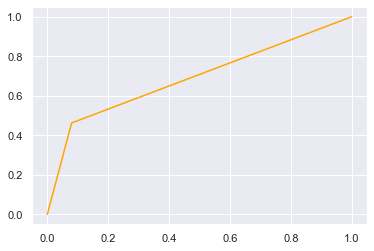

In [81]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='orange', label='ROC') # plotting Orange colored ROC graph

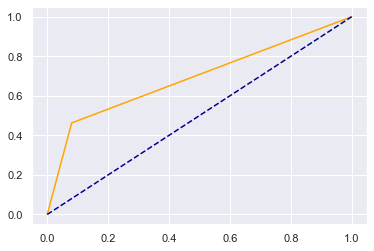

In [82]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='orange', label='ROC') 

# to plot "ROC curve"
plt.plot([0,1], [0,1], color='darkblue',linestyle='--',label='ROC curve (area = %0.2f)' % auc)

Text(0.5, 1.0, 'Receiver Operating Characteristic -ROC Curve')

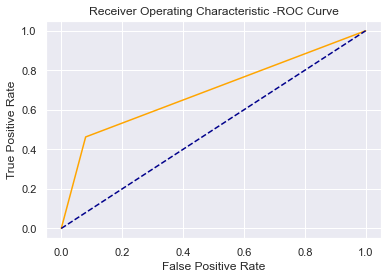

In [83]:
plt.plot(fpr, tpr, color='orange', label='ROC') 
plt.plot([0,1], [0,1], color='darkblue',linestyle='--',label='ROC curve (area = %0.2f)' % auc)

# to LABEL x, y and Title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic -ROC Curve')

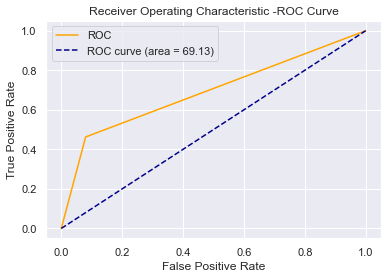

In [84]:
plt.plot(fpr, tpr, color='orange', label='ROC') 
plt.plot([0,1], [0,1], color='darkblue',linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic -ROC Curve')

# to name the graphs
plt.legend()
plt.show()

In [85]:
# Observation:
        # ROC Curve covers area of ~ almost 69-70%
        # good enough to consider this model

#### What is the significance of Roc curve and AUC?

In real life, we create various models using different algorithms that we can use for classification purpose. We use AUC to determine which model is the best one to use for a given dataset. 
Suppose we have created Logistic regresasion, SVM as well as a clustering model for classification purpose. We will calculate AUC for all the models seperately. The model with highest AUC value will be the best model to use.


#### Advantages of Logisitic Regression

* It is very simple and easy to implement.
* The output is more informative than other classification algorithms
* It expresses the relationship between independent and dependent variables
* Very effective with linearly seperable data

#### Disadvantages of Logisitic Regression

* Not effective with data which are not linearly seperable 
* Not as powerful as other classification models
* Multiclass classifications are much easier to do with other algorithms than logisitic regression
* It can only predict categorical outcomes